In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_melb = pd.read_csv('/content/drive/MyDrive/data/melb_data.csv')
print(df_melb.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


# **Q1** **a**

Car, BuildingArea, YearBuilt, CouncilArea each have a lot of missing variable. Car only has 62 which is manageable compared to the other variable mentioned which have thousands of missing data.

In [4]:
df_melb.isna().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# **Q1** **b**

,Regionname,Price_median
0,Eastern Metropolitan,1010000.0
1,Eastern Victoria,670000.0
2,Northern Metropolitan,806250.0
3,Northern Victoria,540000.0
4,South-Eastern Metropolitan,850000.0
5,Southern Metropolitan,1250000.0
6,Western Metropolitan,793000.0
7,Western Victoria,400000.0


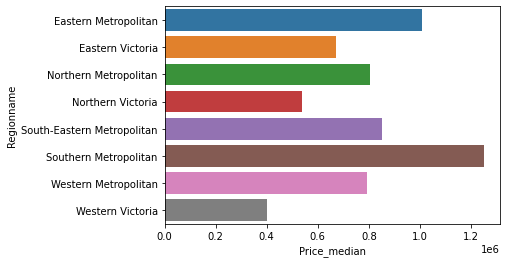

In [5]:
#compute median per housing 
df_temp = df_melb.groupby('Regionname').apply(lambda x: x['Price'].median()).to_frame(name = 'Price_median').reset_index()
df_temp

sns.barplot(y='Regionname', x='Price_median', data=df_temp)
df_temp


I think `Regionname` could affect the houding price but my prediction is not based on this graph.

# **Q1** **c**

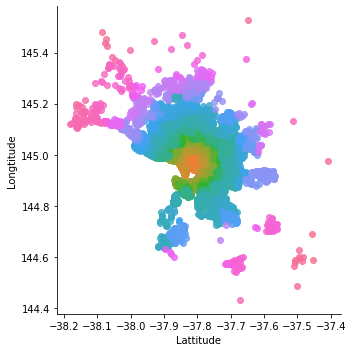

In [6]:
sns.lmplot(x = 'Lattitude', y = 'Longtitude', hue = 'Distance', data=df_melb, legend=False, fit_reg=False)

It seems to be the location of houses on the map relatively to origin which is CBD I think it means central business district.

# **Q2** **a** 

In [7]:
pop_mean = df_melb['Price'].mean()
#region selected southern metropiltan (Highest price median of all region)
df_sample = df_melb[df_melb['Regionname']=='Southern Metropolitan'].sample(n=25)
sample_mean = df_sample['Price'].mean()

#Use the standard error of the sample as the variance for the distribution of sample means.
import scipy.stats
std_error = scipy.stats.sem(df_sample['Price'], nan_policy='omit')

# z-score 
z = (sample_mean - pop_mean) / (std_error)
z

2.4574988085531486

**Hypothesis test:**


*   Null Hypothesis: The mean of Housing Price in southern metropolitan of melbourne does not differ from the population mean of housing price in melbourne.
*   Alternative Hypothesis: The mean of Housing Price in southern metropolitan of melbourne differ from the population mean of housing price in melbourne.




In [8]:
def p_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)
p = 2*p_of_z(-z)
p

0.013990827481816058

With alpha = 0.5, p < alpha we are going to reject the null hypothesis 

# **Q3** **a**
Finding two variables that are linearly correlated

(1800.0, 2000.0)

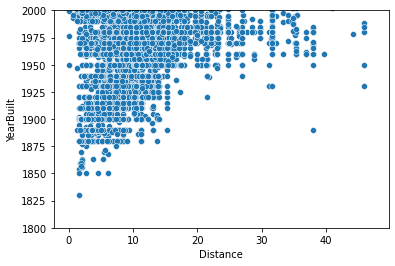

In [9]:
import seaborn as sns 
#sns.pairplot(df_melb)
plot = sns.scatterplot(x = 'Distance', y = 'YearBuilt', data = df_melb)
plot.set_ylim(1800, 2000)

# **Q3** **b**


In [10]:
correlation = df_melb.corr()
print(correlation.loc['YearBuilt', 'Distance'])

0.24637882379568835


In [12]:
# distance and price 
# room and cars 
#bedroom2 and rooms
# price and rooms
#price and year built 
# lansize and building area 



0.24637882379568835


# **Q3** **c**


(1800.0, 2000.0)

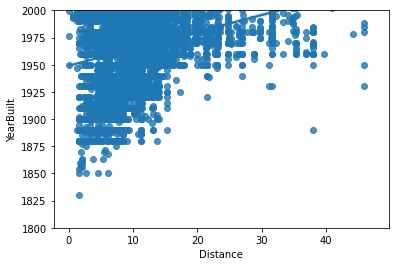

In [11]:
#plot = sns.regplot(data=df_melb, x = df_melb['Distance'], y = df_melb['YearBuilt'])
plot = sns.regplot( x = 'Distance', y = 'YearBuilt', data=df_melb)
plot.set_ylim(1800, 2000)

# **Q4** 


In [12]:
model = ols(formula = 'Price ~ Distance + Rooms + YearBuilt', data = df_melb)
res  = model.fit()
res.rsquared

0.42627164285245767

# **Q5** **a**

In [13]:
train, val = train_test_split(df_melb, test_size=0.1, random_state=2022)


# **Q5** **b**

In [14]:
#df_melb.groupby('SellerG').apply(lambda x: x['Price'].mean()).to_frame(name = 'Price_median').reset_index()

expensive = []
cheap = [] 
medium = [] 

def prework():

  for i in range (len(df_melb["Price"])):
    if df_melb["Price"][i] >= 76085.0 and df_melb["Price"][i] < 900500.0:
      cheap.append(df_melb["SellerG"][i])
    elif df_melb["Price"][i] >= 900500.0 and df_melb["Price"][i] < 3651000.0:
      medium.append(df_melb["SellerG"][i])
    elif df_melb["Price"][i] >= 3651000.0 and df_melb["Price"][i] <= 9000000.0:
      expensive.append(df_melb["SellerG"][i])
prework()


In [17]:
def categorizing(x):
  if x in cheap:
    return 1
  elif x in medium:
    return 2
  elif x in expensive:  
    return 3
  return categorizing

df_melb['seller_rate'] = df_melb.SellerG.transform(categorizing)

# **Q5** **c**

In [18]:
train, val = train_test_split(df_melb, test_size=0.1, random_state=2022)
model_q5 = ols(formula = 'Price ~ Distance + Rooms + YearBuilt + seller_rate', data = val)

res  = model_q5.fit()
#reporting the rsquared on the validation set
res.rsquared

0.5065078264400763

# **Q6** **a**

In [19]:
#creating above median 
df_median = df_melb.Price.median()

def above_median(x):
  if x > df_median:
    return 1
  else: 
    return 0

df_melb['above_median'] = df_melb.Price.transform(above_median)



# **Q6** **b**

In [63]:
train, val = train_test_split(df_melb, test_size=0.1, random_state=2022)
#model from q5 but on the training set
model_q5 = ols(formula = 'Price ~ Distance + Rooms + YearBuilt + seller_rate', data = train)
res_1 = model_q5.fit()

from sklearn import metrics
y = val['above_median'] 
y_hat = res_1.predict(val)
y_pred_1 = (y_hat > val['Price'].median()).apply(int)

acc = metrics.accuracy_score(y, y_pred_1)
print(f'The Accuracy of this model is {100*acc}%')



The Accuracy of this model is 63.18114874815905%


# **Q6** **c**

In [64]:
from statsmodels.formula.api import logit
model = logit(formula = 'above_median ~ Distance + Rooms + YearBuilt + seller_rate', data = train)
res = model.fit()

x_2 = val[['Distance' , 'Rooms' , 'YearBuilt', 'seller_rate']]
y_2 = val['above_median']
#print(val)
y_hat = res.predict(x_2)

y_pred_2 = (y_hat >= df_median).apply(int)

acc = metrics.accuracy_score(y_2, y_pred_2)
print(f'The Accuracy of this model is {100*acc}%')

         Current function value: 0.462164
         Iterations: 35
The Accuracy of this model is 51.03092783505154%


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# **Q6** **d**

In [65]:
auc = metrics.roc_auc_score(y, y_pred_1)
recall = metrics.recall_score(y, y_pred_1)
prec = metrics.precision_score(y, y_pred_1)
print(f'The Recall of the OLS model on the validation set is {recall}')
print(f'The Precision of the OLS model on the validation set is {prec}')
print(f'The AUC of the OLS model is {auc}')

print()

auc = metrics.roc_auc_score(y_2, y_pred_2)
recall = metrics.recall_score(y_2, y_pred_2)
prec = metrics.precision_score(y_2, y_pred_2)
print(f'The Recall of the Logit model on the validation set is {recall}')
print(f'The Precision of the Logit model on the validation set is {prec}')
print(f'The AUC of the Logit model is {auc}')

The Recall of the OLS model on the validation set is 0.49774436090225566
The Precision of the OLS model on the validation set is 0.6659959758551308
The AUC of the OLS model is 0.629103060682008

The Recall of the Logit model on the validation set is 0.0
The Precision of the Logit model on the validation set is 0.0
The AUC of the Logit model is 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Q7**

In [66]:
from sklearn.linear_model import Lasso

x_train = train[['Bedroom2','Bathroom','Landsize','Lattitude','Longtitude',	'Propertycount',	'seller_rate','above_median']]
y_train = train['Price']

model = Lasso(alpha=0.01)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.5513161078939356
